In [166]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# import csv file data

df = pd.read_csv(r"C:\Users\RBI\Desktop\Diwali Sales.csv",encoding = 'unicode_escape')

In [168]:
# display the 1st five rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [169]:
df.shape

(11251, 15)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


It can be seen that the Staus and unnamed1 columns have null values. Therefore drop the column.

In [174]:
# drop Status and unnamed1 column
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [175]:
# Check missing values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

The Amount column as 12 missing i.e. Nan values

In [176]:
# Remove NaN Values from amount
df.dropna(inplace=True)

In [177]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [11]:
df.shape

(11239, 13)

In [178]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [179]:
df['Amount'].dtypes

dtype('int32')

In [180]:
df.State.value_counts()

Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [19]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [164]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### 1. Gender

### Which gender shops more Males or Females?

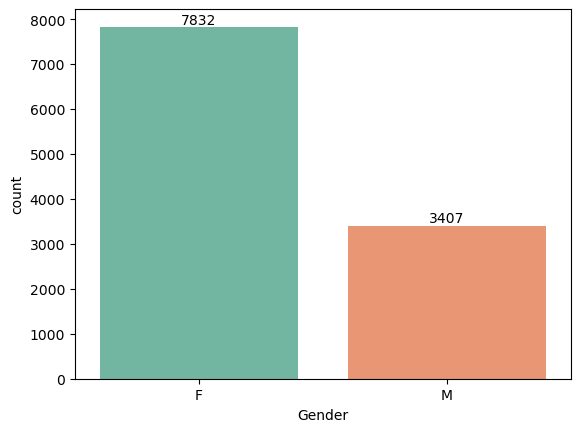

In [37]:
a=sns.countplot(x='Gender',data=df,palette="Set2")

for bars in a.containers:
    a.bar_label(bars)

# Show the plot
plt.show()

###  Who sepnds more amount of money on Shoppig males or females?

In [96]:
gender_spend=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
gender_spend

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

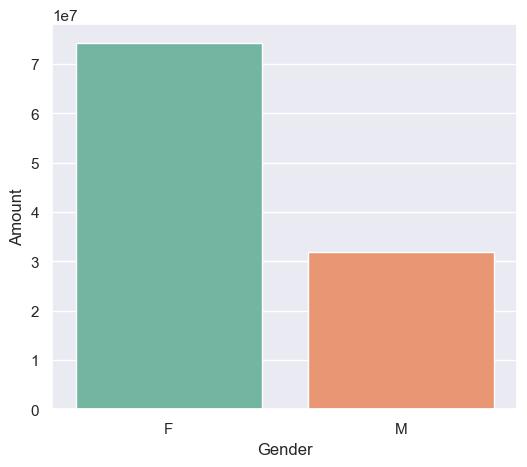

In [97]:
sns.barplot(x='Gender',y='Amount',data=gender_spend,palette="Set2")       

From the graph it can be seen that there are more number of female buyers and their purchasing power is more.

### 2.  Age

### What are the total number of buyers based on their age group?

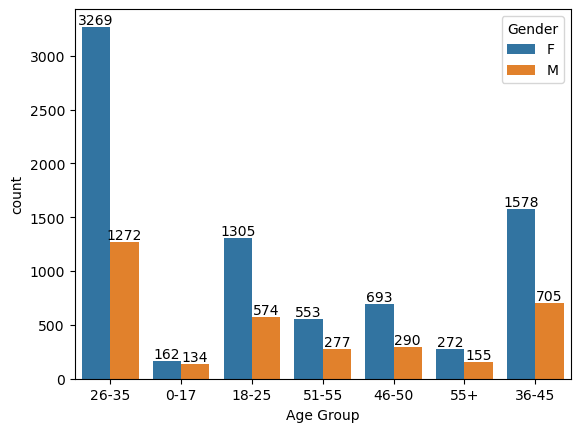

In [73]:
a=sns.countplot(x='Age Group',data=df, hue = 'Gender')             # hue differentiates between men and women

for bars in a.containers:
    a.bar_label(bars)

# Show the plot
plt.show()

### Which  age group sepnds more amount ?

In [98]:
age_spend=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
dd

,Marital_Status,Amount
0,0,62125384
1,1,44123745


<Axes: xlabel='Age Group', ylabel='Amount'>

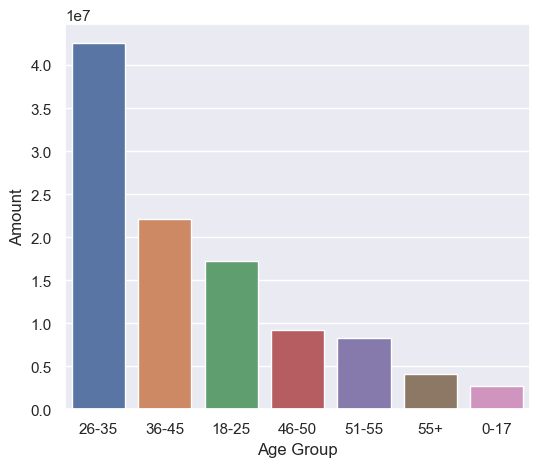

In [99]:
sns.barplot(x='Age Group',y='Amount',data=age_spend)       

From the graph it  can seen that most of the buyers are females in the age group 26-35 and the amount spend by them is also more.

### 3.  Marital Status

### Whether married or unmaried people shop more?

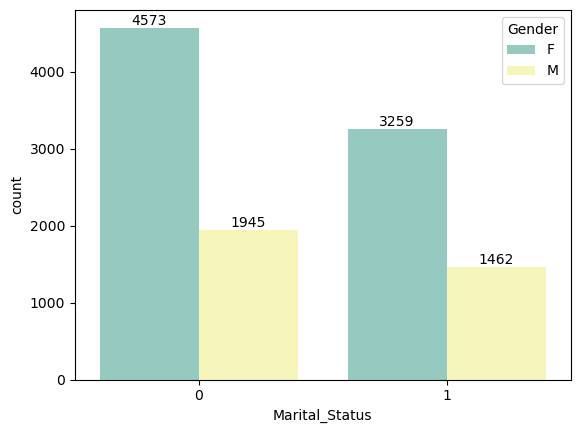

In [87]:
a=sns.countplot(x='Marital_Status',data=df, palette='Set3',hue='Gender')            

for bars in a.containers:
    a.bar_label(bars)

# Show the plot
plt.show()

### Who spends more on shopping married or unmaried person?

<Axes: xlabel='Marital_Status', ylabel='Amount'>

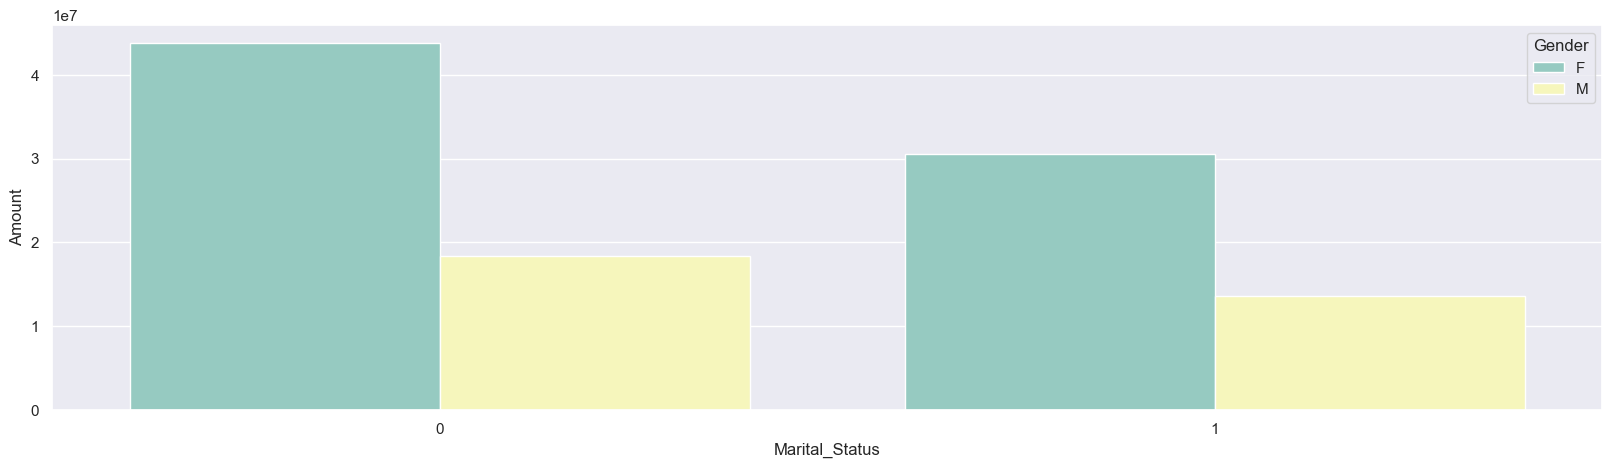

In [160]:
sales_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data = sales_status, x = 'Marital_Status',y= 'Amount', hue='Gender',palette='Set3')

From the graph it can be seen that most of the buyers are married women. They have high purchasing power.

###  4. State

###  Which State has the higest number of orders?

<Axes: xlabel='State', ylabel='Orders'>

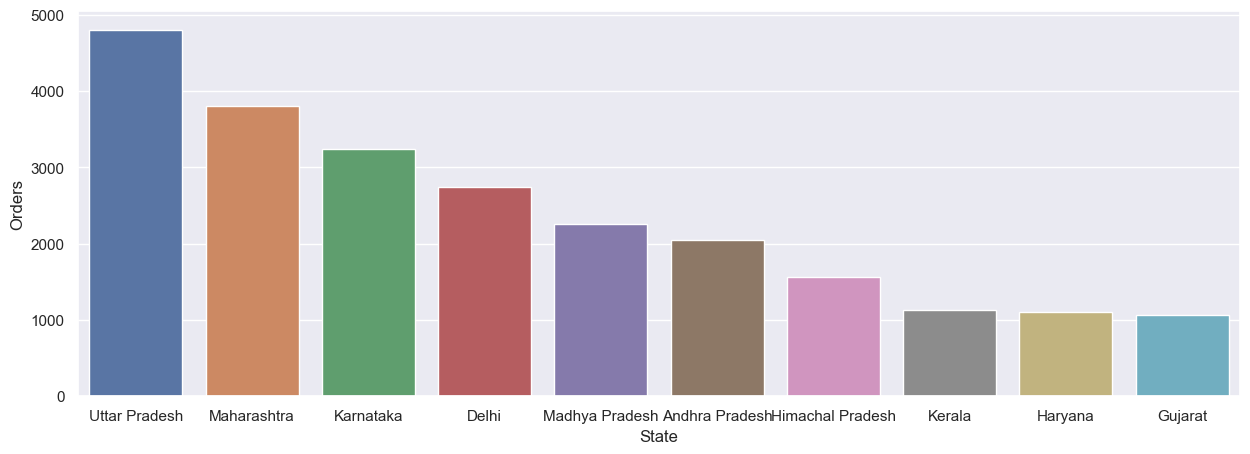

In [119]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)


sns.barplot(data = sales_state, x = 'State',y= 'Orders',)

### What is the higest amount sepnd by each state?

<Axes: xlabel='State', ylabel='Amount'>

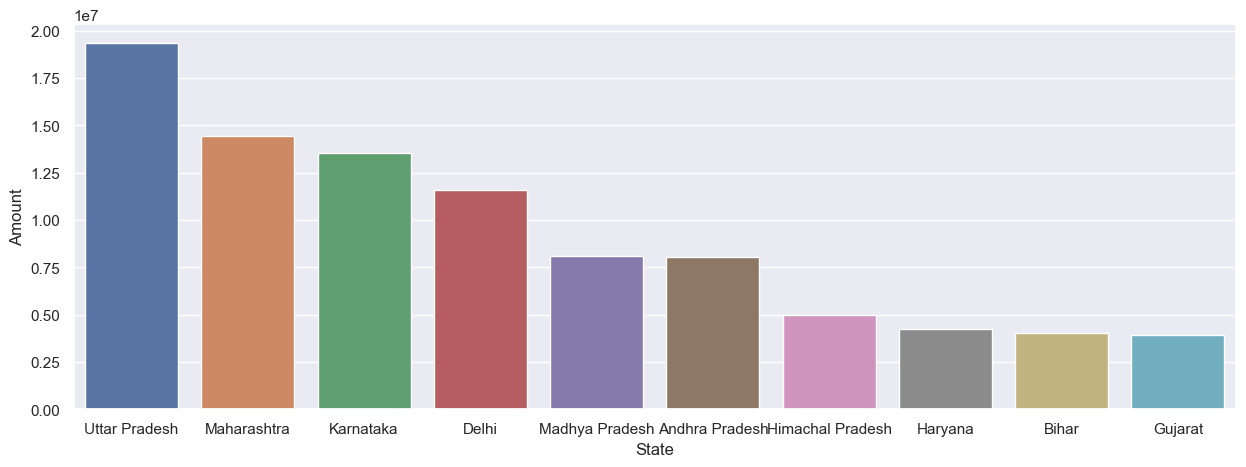

In [128]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From above graphs it can be seen that most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively. The amount or the toatal sales there is also high.

### 5.  Occupation

### Which occupation of people shop more?

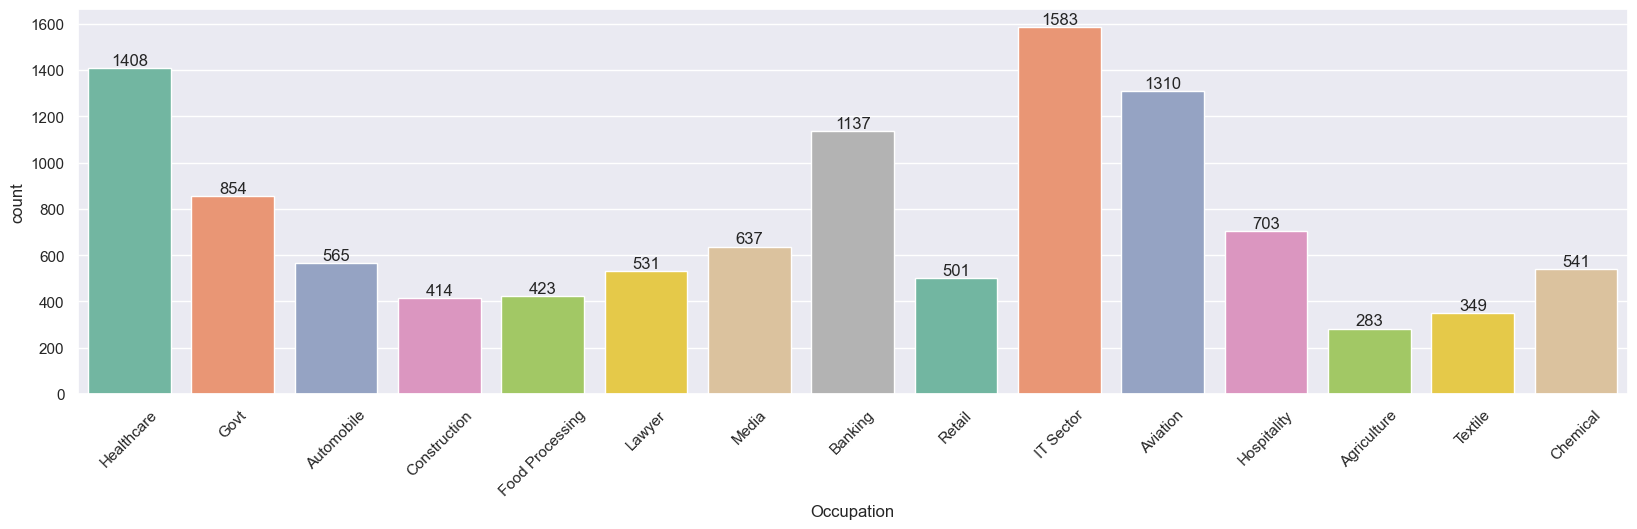

In [150]:
a = sns.countplot(data = df, x = 'Occupation',palette='Set2')

for bars in a.containers:
    a.bar_label(bars)
    
plt.xticks(rotation=45);

### Which sector has spend the higest  amount ?

<Axes: xlabel='Occupation', ylabel='Amount'>

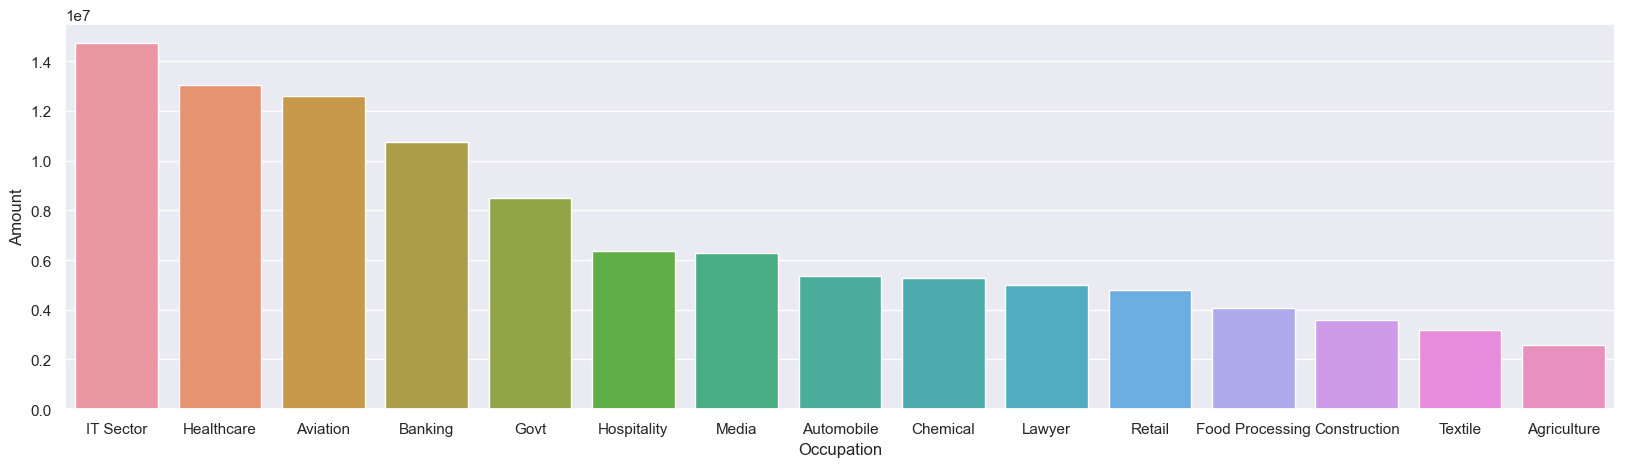

In [161]:
sales_sector = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_sector, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### 6. Product Category

### Which category product has been orderd the most?

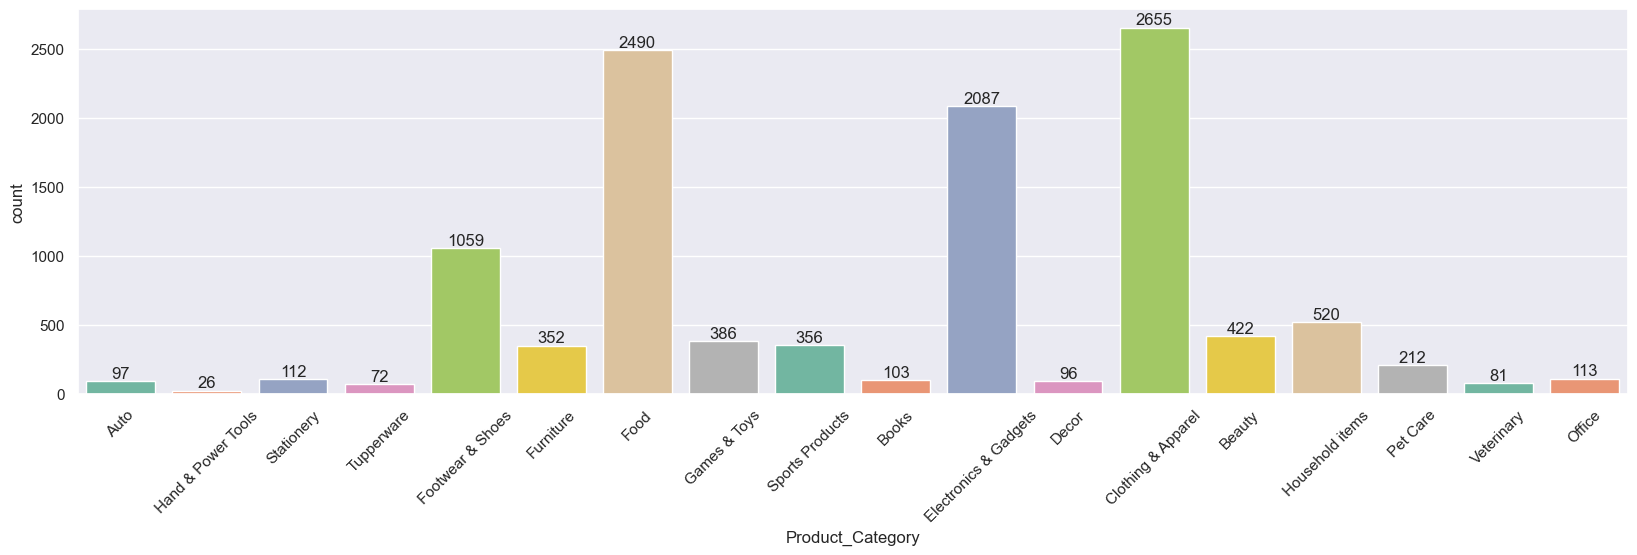

In [162]:
a = sns.countplot(data = df, x = 'Product_Category',palette='Set2')

for bars in ax.containers:
    a.bar_label(bars)
    
plt.xticks(rotation=45);

### Which catergory product has the higest sales?

<Axes: xlabel='Product_Category', ylabel='Amount'>

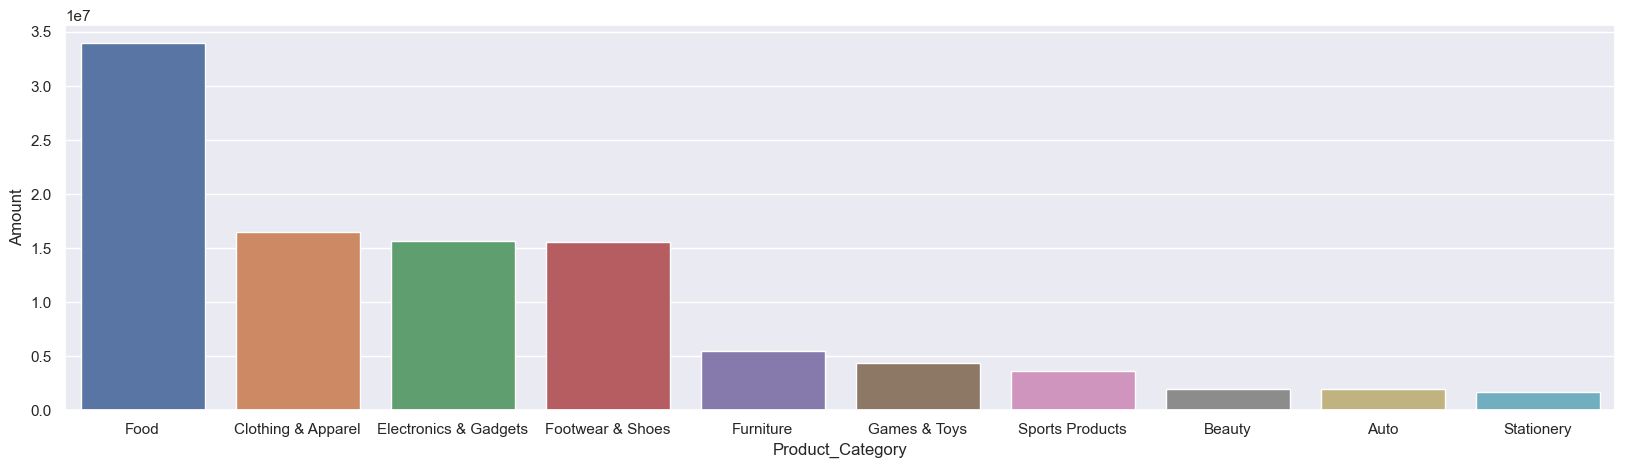

In [163]:
sales_cat = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_cat, x = 'Product_Category',y= 'Amount')

From the Graph it can be seen Clothing, Food and Electronic gadgets are orderd the most respectively. But Food has the higest number of sales.

## Conclusion:

    
    

From the analysis done above it can is concluded that most of the married women from the age 26-35 years,  working in IT , Healthcare and Aviation sector, living in UP, Maharastra and Karnataka  are likey to buy products from Food, Clothing and Electronics category.